In [1]:
# Thomsong sampling creates a distribution of expected return value for each ad
# UBC is deterministic algorithm thomson is propabilstic
# pulls a value from constructed distributions
# Consider pulled values as hypothetical return value
# get return (real) for selected ad
# redefine return distributions

### Comparison betwen thomson samplig and UCB
# UCB is deterministic
# there are many algorithmics online for UCB
# thomson sampling is propabilistic
# UCB requires update every round
# cannot proceed on next round without getting result and updating UCB
# Thomsong sampling can accept delays on updating return
# Thomsong sampling algorithm has better empirical evidence

##############################
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

In [2]:
# Importing the dataset
# must make UTS/Laptop varibales
ws_sub = r"Thompson Sampling"
ws = r"Data"
data_file = "Ads_CTR_Optimisation.csv"

data_file_path = os.path.join(os.path.join(os.path.join(ws, ws_sub), "data"),data_file)

dataset = pd.read_csv(data_file_path)
# dataset

# Dataset in this occasion is just to simulate the results
# first row shows which ads will first user click if shown to him
# we will have 10k rounds to obtain data

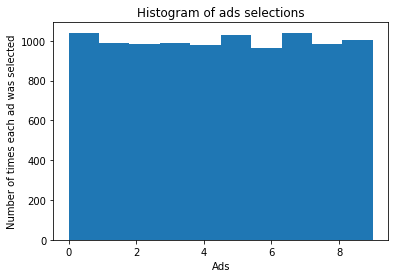

In [3]:
# Results doing random pick ads
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward += reward
# Visual display random pick
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [6]:
# thomson Sampling algorithm
# Step1: at each round n, we consider two numbers for each ad i
#  N1i(n) the number of times the ad i got reward 1 up to round n
#  N0i(n) the number of times the ad i got reward 0 up to round n
# Step2: For each ad i, we take a random draw from the distribution:
#  Fi(n) = B(N1i(n) + 1, N0i(n) + 1)
#   for fi i search bayesr rule aproach Fi by posterior distribution
# Step3:
#  We select the ad with the higherst Fi(n)



N = 10000
d = 10
# Declaring the number of selection and number of rewards
numbers_of_selections = [0] * d
number_of_rewards_1 = [0] * d
number_of_rewards_0 = [0] * d
ads_selected = []
# loop for N simulations
for n in range(0, N):
    ad = 0
    max_random_draw = 0
    # calulating step 2 for each ad
    for i in range(0, d):
        random_beta = random.betavariate(number_of_rewards_1[i] + 1,number_of_rewards_0[i] + 1)# beta is distribution name
        # random.betavar # from random library
        if random_beta > max_random_draw:
            max_random_draw = random_beta
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    if reward == 1:
        number_of_rewards_1[ad] += reward
    else:
        number_of_rewards_0[ad] += 1
    


In [7]:
# sum(number_of_rewards_1) # =? 2619

# UCB
# sum(sums_of_rewards) =? 2178 # Total reward

2619

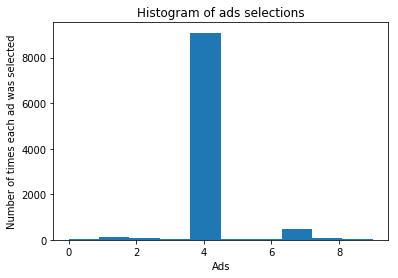

In [8]:
# Visual display random pick
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()